In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv('results.csv')
df

,method,masked,grey,red,green,blue,SRM,EBC,brightness
0,random sampling,True,81,157,56,9,17,33,47
1,pca + random sampling,True,79,155,54,7,17,33,46
2,most dominant,True,80,153,52,4,18,35,47
3,pca + most dominant,True,79,155,54,7,17,33,46
4,raw,False,79,155,53,7,17,33,46
...,...,...,...,...,...,...,...,...,...
2630,random sampling,True,145,229,129,10,11,22,78
2631,pca + random sampling,True,143,226,126,9,11,22,77
2632,most dominant,True,142,224,123,5,11,22,76
2633,pca + most dominant,True,142,226,126,8,11,22,76


# Load data

In [20]:
df = pd.read_csv('results.csv')
df_rand = df[(df.method=='random sampling') | (df.method=='pca + random sampling') ]
df_most = df[(df.method=='most dominant') | (df.method=='pca + most dominant') ]

# Explore data

To see the difference between pre-processed with PCA and not preprocessed with PCA data is plotted per method

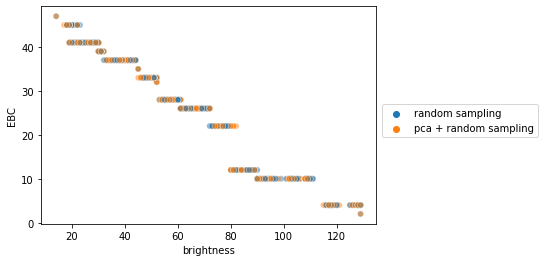

In [21]:
sns.scatterplot(data=df_rand, x='brightness', y='EBC', hue='method', alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('bright_ebc_randsampling.jpeg')

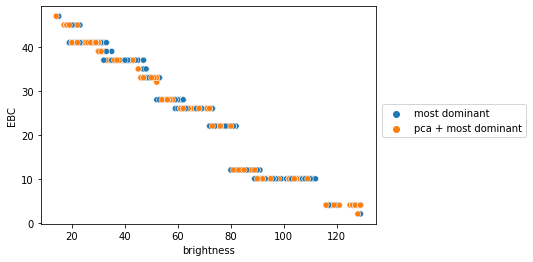

In [22]:
sns.scatterplot(data=df_most, x='brightness', y='EBC', hue='method')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)
plt.savefig('bright_ebc_most.jpeg')

As we can see the PCA method + most dominant is not suitable for regression. The PCA method is not of added value. We should concentrate on most dominant and random sampling

# model without PCA processing

As depicted above brightness and grey value might be used for the regression model

In [23]:
def model_data(df, method):
    df = df[df.method==method] 
    y = df['EBC']
    X = np.array(df[['grey', 'brightness']])
    object= StandardScaler()
    scale = object.fit_transform(X) 
    reg = LinearRegression().fit(X, y)
    pred = reg.predict(X)
    df['predicted EBC'] = pred
    title = f'EBC for generated pictures ({method})= {reg.coef_[0]:.2f} * grey value + {reg.coef_[1]:.2f} * brightness'
    return df, title


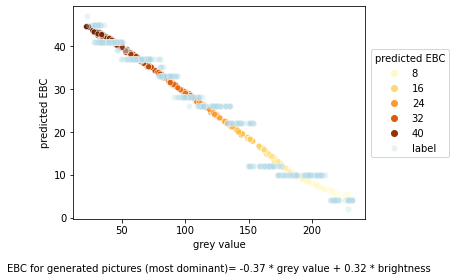

In [24]:
method = 'most dominant'

data = df
dfm, title = model_data(data, method)

sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n
{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')


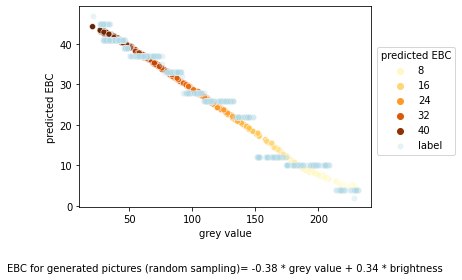

In [25]:
method = 'random sampling'

data = df
dfm, title = model_data(data, method)

sns.scatterplot(data=dfm, x='grey', y='predicted EBC', hue = 'predicted EBC', palette = "YlOrBr")
sns.scatterplot(data=dfm, x='grey', y='EBC', color = 'lightblue', alpha = 0.3, label = 'label')
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0, title = 'predicted EBC')
plt.xlabel(f'''grey value\n

{title}''')
plt.tight_layout()
plt.savefig(f'regression_{method}.jpeg')